In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt


random.seed(100)
torch.manual_seed(100)
torch.use_deterministic_algorithms(False)

# Base de Datos

In [ ]:
data = load_iris()
x = data.data
y = data.target

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Parámetros

In [ ]:
input_size = 4 #Num columnas
num_classes = 3 #Salidas
learning_rate = 0.1 #Error
num_epochs = 20 #Epocas

# Modelo

In [ ]:
class Model(nn.Module):
  def __init__(self, input_size, num_classes):
    super(Model, self).__init__()
    self.fc1 = nn.Linear(input_size, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 32)
    self.fc4 = nn.Linear(32, 3)
    self.relu = nn.ReLU()

  def forward(self, x):
    out = self.relu(self.fc1(x))
    out = self.relu(self.fc2(out))
    out = self.relu(self.fc3(out))
    out = self.fc4(out)

    return out

In [ ]:
model = Model(input_size, num_classes) #Modelo

criterion = nn.CrossEntropyLoss() #Función de coste
optimizer = optim.Adam(model.parameters(), lr = learning_rate) #Optimizador

# Entrenamiento

Epoch [1/20], Loss: 1.1268
Epoch [2/20], Loss: 3.2396
Epoch [3/20], Loss: 5.5434
Epoch [4/20], Loss: 3.1273
Epoch [5/20], Loss: 1.4368
Epoch [6/20], Loss: 0.8016
Epoch [7/20], Loss: 1.1060
Epoch [8/20], Loss: 0.9822
Epoch [9/20], Loss: 0.6987
Epoch [10/20], Loss: 0.6885
Epoch [11/20], Loss: 0.5276
Epoch [12/20], Loss: 2.0661
Epoch [13/20], Loss: 5.5085
Epoch [14/20], Loss: 4.0476
Epoch [15/20], Loss: 0.7203
Epoch [16/20], Loss: 0.7614
Epoch [17/20], Loss: 0.5350
Epoch [18/20], Loss: 1.0271
Epoch [19/20], Loss: 1.5654
Epoch [20/20], Loss: 2.0009


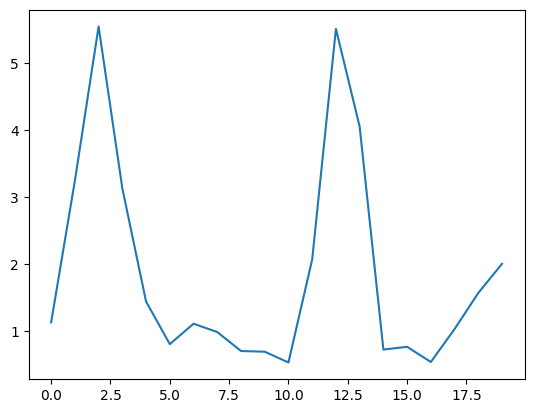

In [ ]:
ls = []
for epoch in range(num_epochs):
  outputs = model(x_train) #Entrenar el modelo
  loss = criterion(outputs, y_train) #Calcula el error en cada epoca

  loss.backward() #Regresa para checar los errores
  optimizer.step() #Modifica los pesos
  ls.append(loss.item())

  print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

plt.plot(ls)

# Validación

In [ ]:
with torch.no_grad(): #No calcular los gradientes
  outputs = model(x_test)
  _, predicted = torch.max(outputs.data, 1) #Traer el valor más grande
  correct = (predicted == y_test).sum().item() #Solo si son iguales se suman
  total = y_test.size(0)
  print(f'Accuracy: {correct/total:.4}') #El número de correctos entre el total de veces que lo hizo

Accuracy: 0.9667
